## Import Libraries

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


## Import Dataset 

In [3]:
data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')


## Check Dataset 

In [26]:
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.shape

(1000, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Data Cleaning 

In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'])

/tmp/ipykernel_33/2814229062.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

## Add Column 

In [22]:
# Add a new column for weekday names
data['Day Name'] = data['Date'].dt.day_name()

# Add a new column for month names
data['Month Name'] = data['Date'].dt.month_name()

# Extract the start of the hour
data['Start of Hour'] = data['Time'].dt.floor('H').dt.time

# Display the updated DataFrame
data.head()



/tmp/ipykernel_33/4145534185.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Start of Hour'] = data['Time'].dt.floor('H').dt.time


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gross Margin,Day Name,Month Name,Start of Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-05-31 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,0.047619,Saturday,January,13:00:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-05-31 10:29:00,Cash,76.40,4.761905,3.8200,9.6,0.047619,Friday,March,10:00:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-05-31 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,0.047619,Sunday,March,13:00:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-05-31 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,0.047619,Sunday,January,20:00:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-05-31 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,0.047619,Friday,February,10:00:00


In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data analysis

### Sales Analysis

#####  1. What are the total sales per branch?

  Branch  Total Sales
0      A     106200.0
1      B     106198.0
2      C     110569.0


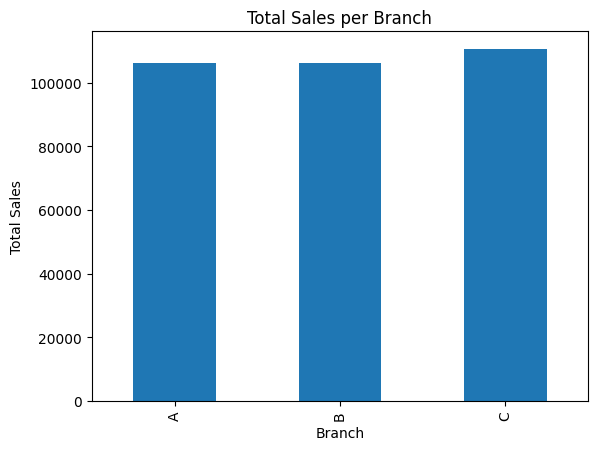

In [53]:
# Calculate the total sales per branch
total_sales_per_branch = data.groupby('Branch')['Total'].sum().round().reset_index()
total_sales_per_branch.columns = ['Branch', 'Total Sales']

# Display the results
print(total_sales_per_branch)

# Optionally, plot the results for better visualization
import matplotlib.pyplot as plt

total_sales_per_branch.plot(kind='bar', x='Branch', y='Total Sales', legend=False)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Total Sales per Branch')
plt.show()

##### 2. Which product line has the highest total sales?


             Product Line  Total Sales
0  Electronic accessories     54337.53
1     Fashion accessories     54305.90
2      Food and beverages     56144.84
3       Health and beauty     49193.74
4      Home and lifestyle     53861.91
5       Sports and travel     55122.83


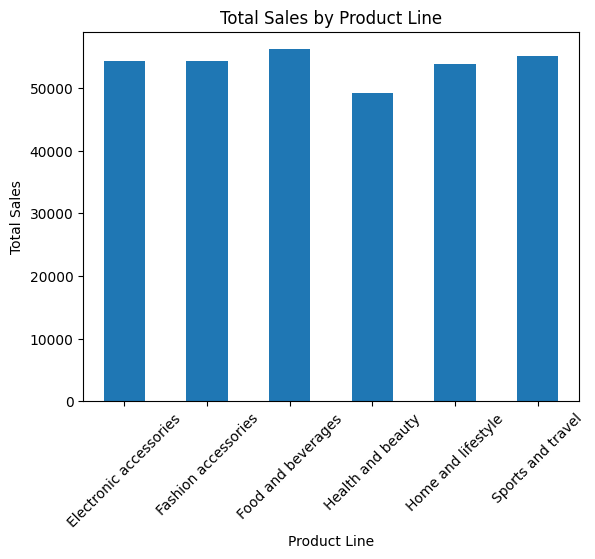

In [54]:
# Aggregate the total sales by product line
total_sales_product_line = data.groupby('Product line')['Total'].sum().round(2).reset_index()
total_sales_product_line.columns = ['Product Line', 'Total Sales']

# Display the results
print(total_sales_product_line)

# Optionally, plot the results for better visualization
import matplotlib.pyplot as plt

total_sales_product_line.plot(kind='bar', x='Product Line', y='Total Sales', legend=False)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()


### Customer Behaviour


##### 1. What is the distribution of payment methods used by customers?

  Payment Method  Count  Percentage
0        Ewallet    345        34.5
1           Cash    344        34.4
2    Credit card    311        31.1


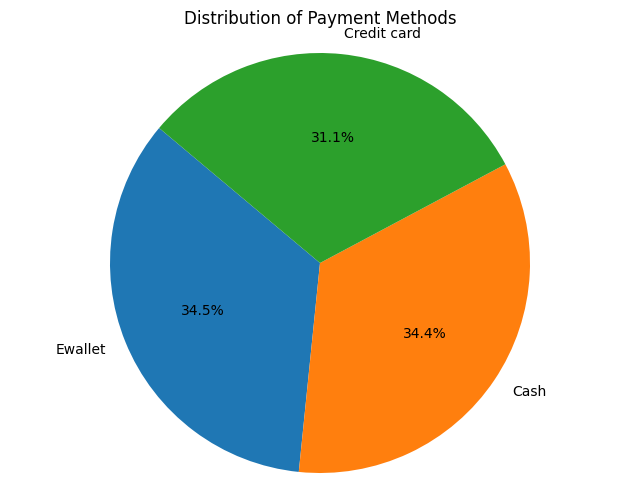

In [55]:
# Count the occurrences of each payment method
payment_counts = data['Payment'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

# Calculate the percentage distribution of each payment method
payment_counts['Percentage'] = (payment_counts['Count'] / payment_counts['Count'].sum()) * 100

# Display the results
print(payment_counts)

plt.figure(figsize=(8, 6))
plt.pie(payment_counts['Count'], labels=payment_counts['Payment Method'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Payment Methods')
plt.show()


##### 2. What is the average customer rating per product line?

             Product Line  Average Rating
0  Electronic accessories            6.92
1     Fashion accessories            7.03
2      Food and beverages            7.11
3       Health and beauty            7.00
4      Home and lifestyle            6.84
5       Sports and travel            6.92


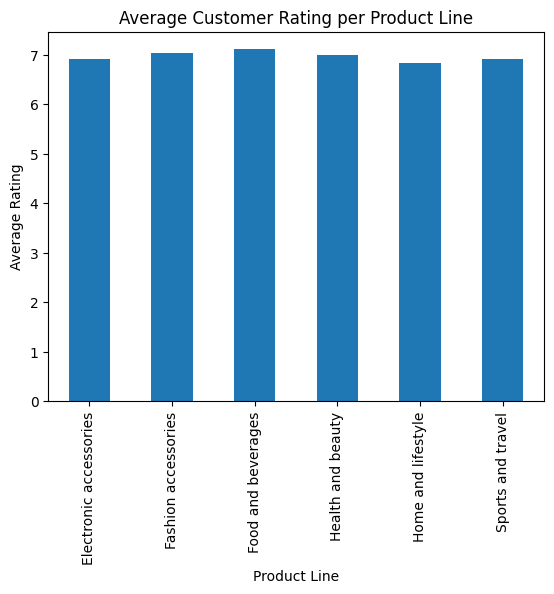

In [57]:
# Calculate the average customer rating per product line
average_rating_per_product_line = data.groupby('Product line')['Rating'].mean().round(2).reset_index()
average_rating_per_product_line.columns = ['Product Line', 'Average Rating']

# Display the results
print(average_rating_per_product_line)

average_rating_per_product_line.plot(kind='bar', x='Product Line', y='Average Rating', legend=False)
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.title('Average Customer Rating per Product Line')
plt.show()


##### 3. How does the gender distribution vary across different branches?

Gender  Female  Male  Total  Female Proportion  Male Proportion
Branch                                                         
A          161   179    340           0.473529         0.526471
B          162   170    332           0.487952         0.512048
C          178   150    328           0.542683         0.457317


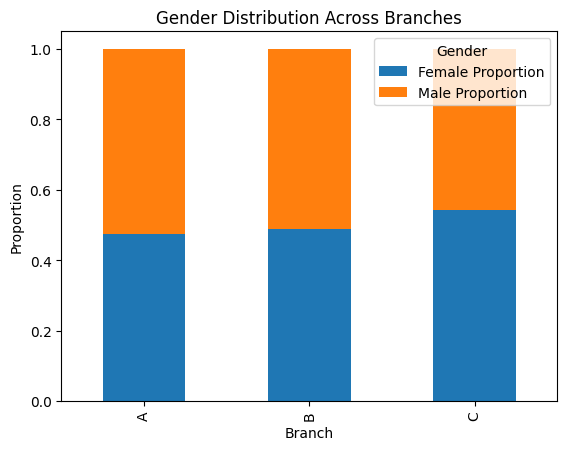

In [34]:
# Calculate the gender distribution per branch
gender_distribution = data.groupby(['Branch', 'Gender']).size().reset_index(name='Count')

# Pivot the data to have branches as rows and gender counts as columns
gender_pivot = gender_distribution.pivot(index='Branch', columns='Gender', values='Count').fillna(0)

# Calculate the proportion of each gender in each branch
gender_pivot['Total'] = gender_pivot.sum(axis=1)
gender_pivot['Female Proportion'] = gender_pivot['Female'] / gender_pivot['Total']
gender_pivot['Male Proportion'] = gender_pivot['Male'] / gender_pivot['Total']

# Display the results
print(gender_pivot)

# Optionally, plot the results for better visualization
gender_pivot[['Female Proportion', 'Male Proportion']].plot(kind='bar', stacked=True)
plt.xlabel('Branch')
plt.ylabel('Proportion')
plt.title('Gender Distribution Across Branches')
plt.show()

### Time-based Analysis

##### 1. What are the peak sales hours in a day?

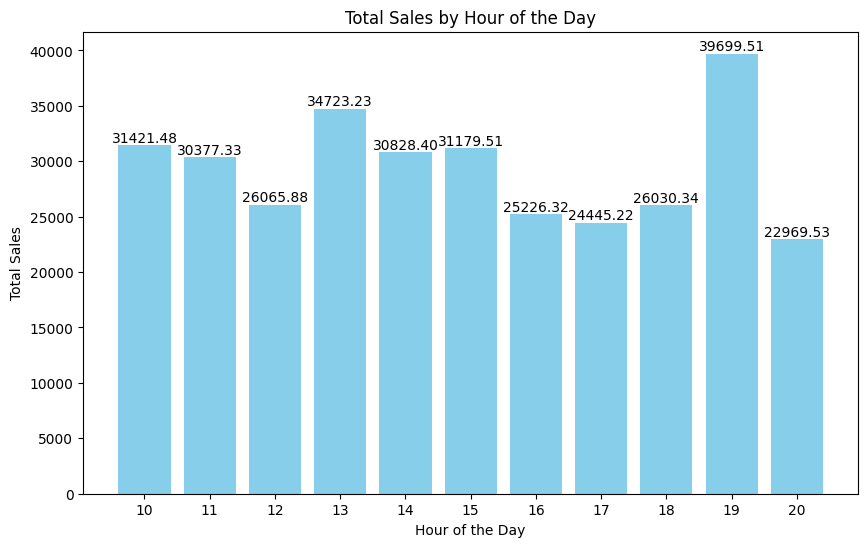

In [60]:
# Convert the 'Time' column to datetime format and extract the hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')
data['Hour'] = data['Time'].dt.hour

# Check for any NaT values in 'Time' column and handle them
if data['Time'].isna().any():
    print("Warning: There are some invalid time entries which have been set to NaT and will be dropped.")
    data = data.dropna(subset=['Time'])

# Aggregate the total sales by hour
hourly_sales = data.groupby('Hour')['Total'].sum().round(2).reset_index()
hourly_sales.columns = ['Hour', 'Total Sales']

# Customize the plot for better visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_sales['Hour'], hourly_sales['Total Sales'], color='skyblue')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of the Day')
plt.xticks(hourly_sales['Hour'])

# Show the plot
plt.show()

##### 2. How do sales vary across different days of the week?

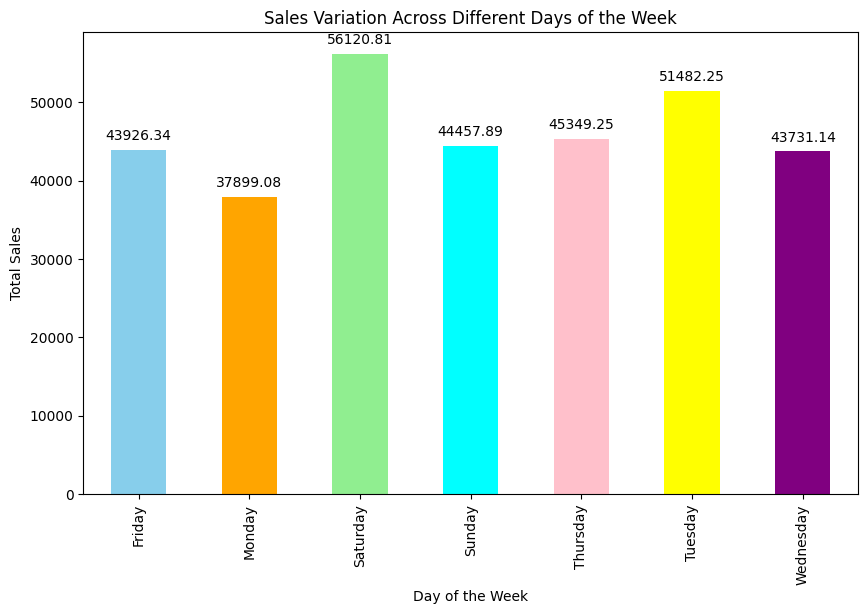

In [23]:
# Handle missing data by filling NaN values with 0
data['Total'] = data['Total'].fillna(0)

# Aggregate sales data by day of the week
sales_by_day = data.groupby('Day Name')['Total'].sum().round(2)

# Sort the results by total sales
sales_by_day_sorted = sales_by_day.sort_values(ascending=False)

# Plot the results for better visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Customize the bar plot
colors = ['skyblue', 'orange', 'lightgreen', 'cyan', 'pink', 'yellow', 'purple']
sales_by_day.plot(kind='bar', color=colors, ax=ax)

# Adding labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Sales')
ax.set_title('Sales Variation Across Different Days of the Week')

# Adding data labels on top of the bars
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Save the plot as an image file
plt.savefig('sales_by_day.png')

# Show the plot
plt.show()



##### 3. What are the monthly sales trends?


   Month       Total
0      1  116291.868
1      2   97219.374
2      3  109455.507


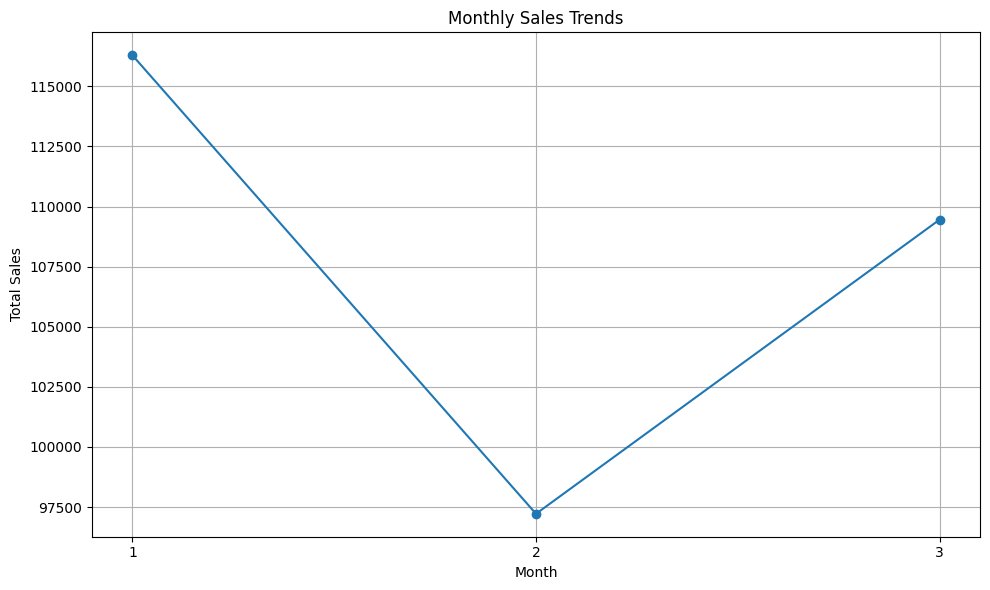

In [30]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the 'Date' column
data['Month'] = data['Date'].dt.month

# Group the data by month and calculate total sales
monthly_sales = data.groupby('Month')['Total'].sum().reset_index()

# Display the results
print(monthly_sales)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Product Performance

##### 1. Which products have the highest unit prices?

             Product line  Unit Price
0  Electronic accessories      104.72
1     Fashion accessories      104.88
2      Food and beverages      104.78
3       Health and beauty      104.96
4      Home and lifestyle      104.92
5       Sports and travel      104.96


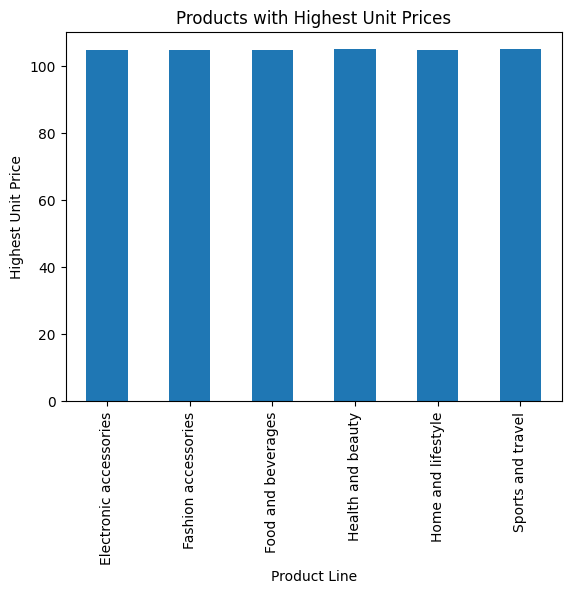

In [49]:
# Calculate the unit price for each product
data['Unit Price'] = data['Total'] / data['Quantity']

# Group by product and find the maximum unit price
max_unit_price_products = data.groupby('Product line')['Unit Price'].max().round(2).reset_index()

# Display the products with the highest unit prices
print(max_unit_price_products)

max_unit_price_products.plot(kind='bar', x='Product line', y='Unit Price', legend=False)
plt.xlabel('Product Line')
plt.ylabel('Highest Unit Price')
plt.title('Products with Highest Unit Prices')
plt.show()


##### 2. What is the correlation between product rating and sales?


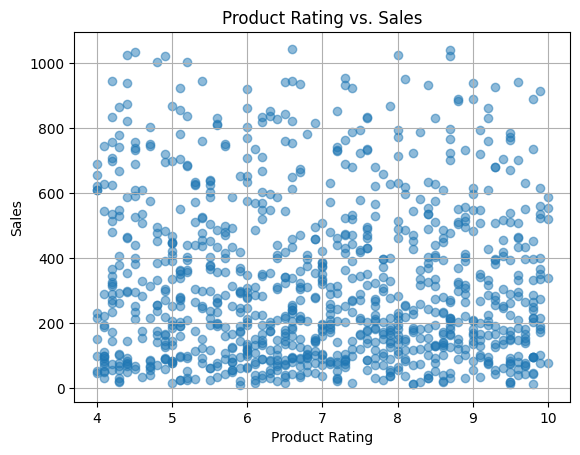

Correlation between product rating and sales: -0.03644170499701834


In [33]:
# Calculate the correlation coefficient between product rating and sales
correlation = data['Rating'].corr(data['Total'])

# Create a scatter plot
plt.scatter(data['Rating'], data['Total'], alpha=0.5)
plt.title('Product Rating vs. Sales')
plt.xlabel('Product Rating')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

print("Correlation between product rating and sales:", correlation)


##### 3. How do gross margins compare across different product lines?

             Product line  Gross Margin
0  Electronic accessories      0.047619
1     Fashion accessories      0.047619
2      Food and beverages      0.047619
3       Health and beauty      0.047619
4      Home and lifestyle      0.047619
5       Sports and travel      0.047619


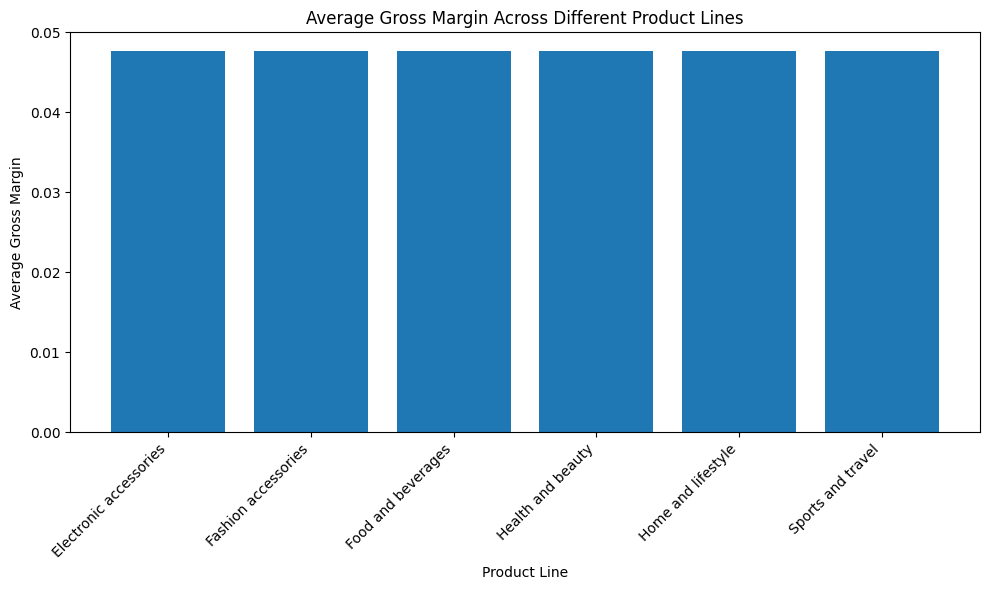

In [15]:
# Calculate gross margin for each product
data['Gross Margin'] = data['gross income'] / data['Total']

# Group by Product line and calculate average gross margin
avg_gross_margin_per_product_line = data.groupby('Product line')['Gross Margin'].mean().reset_index()

# Display the results
print(avg_gross_margin_per_product_line)

# Optionally, plot the results for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_gross_margin_per_product_line['Product line'], avg_gross_margin_per_product_line['Gross Margin'])
plt.xlabel('Product Line')
plt.ylabel('Average Gross Margin')
plt.title('Average Gross Margin Across Different Product Lines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Branch Comparison

##### 1. Which branch has the highest gross income?

In [47]:
# Calculate the gross income for each transaction
data['Gross Income'] = data['Total'] * data['Quantity']

# Aggregate the data by branch and calculate total gross income for each branch
branch_gross_income = data.groupby('Branch')['Gross Income'].sum().round(2).reset_index()
branch_gross_income.columns = ['Branch', 'Total Gross Income']

# Find the branch with the highest total gross income
highest_gross_income_branch = branch_gross_income.loc[branch_gross_income['Total Gross Income'].idxmax()]

print("Branch with the highest gross income:", highest_gross_income_branch['Branch'])
print("Total Gross Income:", highest_gross_income_branch['Total Gross Income'])


Branch with the highest gross income: C
Total Gross Income: 808367.31


##### 2. How do the branches compare in terms of customer traffic?

  Branch  Customer Traffic
0      A               340
1      B               332
2      C               328


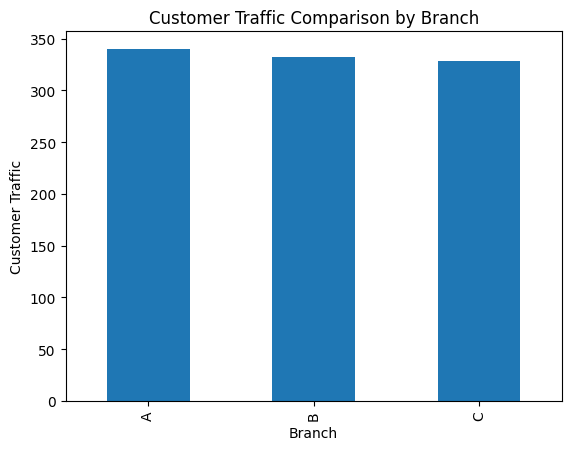

In [36]:
# Count the number of transactions (customer visits) for each branch
customer_traffic = data.groupby('Branch')['Invoice ID'].count().reset_index()
customer_traffic.columns = ['Branch', 'Customer Traffic']

# Display the results
print(customer_traffic)

customer_traffic.plot(kind='bar', x='Branch', y='Customer Traffic', legend=False)
plt.xlabel('Branch')
plt.ylabel('Customer Traffic')
plt.title('Customer Traffic Comparison by Branch')
plt.show()


##### 3. What is the average transaction value per branch?

  Branch  Average Transaction Value
0      A                     312.35
1      B                     319.87
2      C                     337.10


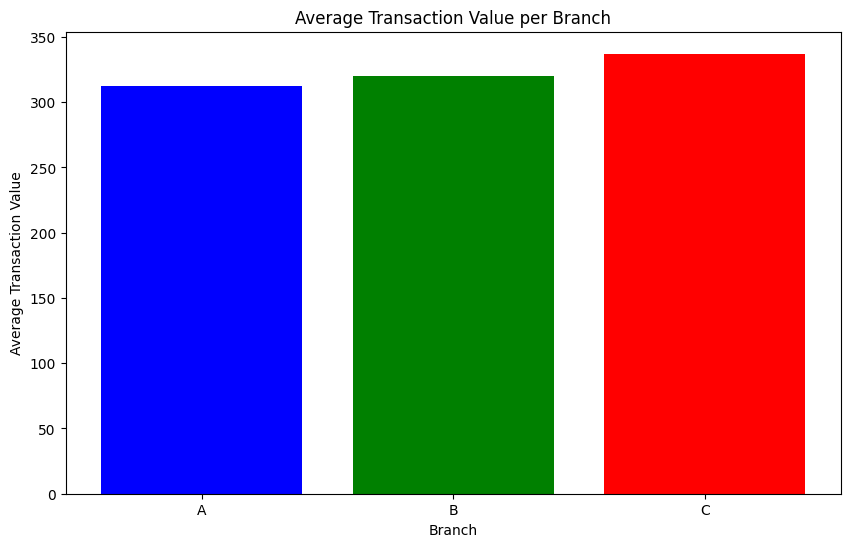

In [10]:
# Calculate the average transaction value per branch
average_transaction_value = data.groupby('Branch')['Total'].mean().round(2).reset_index()
average_transaction_value.columns = ['Branch', 'Average Transaction Value']

# Display the results
print(average_transaction_value)

# Plot the results for better visualization
plt.figure(figsize=(10, 6))
plt.bar(average_transaction_value['Branch'], average_transaction_value['Average Transaction Value'], color=['blue', 'green', 'red'])
plt.xlabel('Branch')
plt.ylabel('Average Transaction Value')
plt.title('Average Transaction Value per Branch')
plt.xticks(rotation=0)
plt.show()

### Customer Demographics

##### 1. What is the gender distribution of customers in each branch

Gender  Female  Male  Total
Branch                     
A          161   179    340
B          162   170    332
C          178   150    328


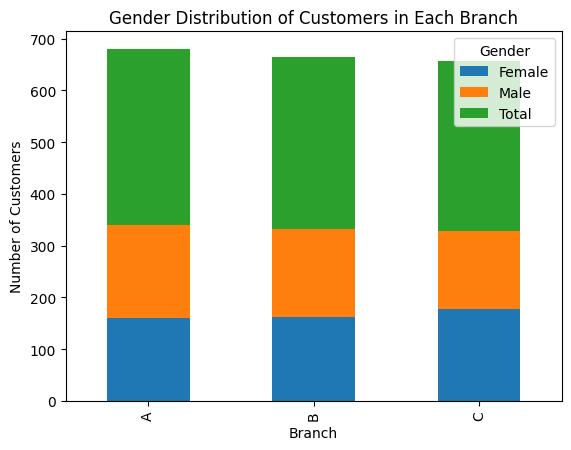

In [45]:
# Calculate gender distribution per branch
gender_distribution = data.groupby(['Branch', 'Gender']).size().unstack(fill_value=0)
gender_distribution['Total'] = gender_distribution.sum(axis=1)

# Display the results
print(gender_distribution)

gender_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Branch')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution of Customers in Each Branch')
plt.legend(title='Gender')
plt.show()


##### 2. How does customer rating differ by gender?

   Gender  Average Rating
0  Female            6.96
1    Male            6.98


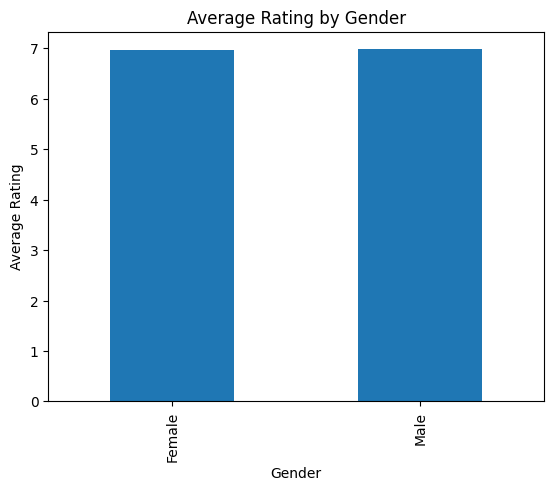

In [9]:
# Calculate the average customer rating by gender
average_rating_by_gender = data.groupby('Gender')['Rating'].mean().round(2).reset_index()
average_rating_by_gender.columns = ['Gender', 'Average Rating']

# Display the results
print(average_rating_by_gender)

average_rating_by_gender.plot(kind='bar', x='Gender', y='Average Rating', legend=False)
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.title('Average Rating by Gender')
plt.show()
